** Имеются серверы, которые периодически выходят из строя. Обозначим $\xi_i$ время между $i$-м и $i+1$-м моментами выхода сервера из строя. Предполагается, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$. **

** Обозначим $N_t$ - количество серверов, которые вышли из строя к моменту времени $t$. В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t-N_s \sim Pois(\lambda(t-s))$ и независима с $N_s$. При этом $N_t$ как функция от $t$ бедт называться пуассоновским процессом интенсивности $\lambda$.  **

**Необходимо узнать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя. В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $E(N_t|N_s)$.**

** Напишем программу, которая после запуска каждые $t_0$ секунд будет выводить уточненное значение предсказания, т.е. $E(N_t|N_{kt_0})$ для $k \in \mathbb{N} $**

In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
%matplotlib inline

In [2]:
data = pd.read_csv('6.csv')

In [3]:
data[:10]

,lambda = 88
0,t_0 = 300
1,t = 90000
2,58.3458
3,117.1273
4,303.7976
5,481.9694
6,496.6469
7,653.6537
8,686.9146
9,694.7753


In [16]:
# Исходя из значений, указанных в файле.
lamb = 88
t_0 = 300
t = 90000
data_nd = np.array(data[2:])
print("data: \n", data_nd[:10],"\ndata size: \n", len(data_nd),"\nlast element: \n", data_nd[-1])

data: 
 [['58.3458']
 ['117.1273']
 ['303.7976']
 ['481.9694']
 ['496.6469']
 ['653.6537']
 ['686.9146']
 ['694.7753']
 ['768.4777']
 ['821.0795']] 
data size: 
 1000 
last element: 
 ['86624.7041']


** Выведим явно, требуемое условное матожидание. $E(N_t|N_s) = E(N_t - N_s + N_s|N_s) =$ (так как $N_t - N_s$ независима от $N_s$ по условию)$=E(N_t - N_s) + N_s = \lambda(t - s) + N_s$. **

In [17]:
iter_number = t / t_0
iter_number = int(iter_number)
print(iter_number)

300


In [18]:
def get_predictions():
    prediction_list = np.zeros(iter_number)
    current_data_index = 0
    N_s = 0
    current_time = 0
    for i in range(iter_number):
        current_time += t_0
        while (current_data_index < 1000 and float(data_nd[current_data_index][0]) <= current_time):
            current_data_index += 1
            N_s += 1
        res = lamb * (t - current_time) + N_s
        print("Time: ", current_time, " Prediction:  ", res)
        prediction_list[i] = res
    return (prediction_list, N_s)

In [19]:
predictions, N_t = get_predictions()

Time:  300  Prediction:   7893602
Time:  600  Prediction:   7867205
Time:  900  Prediction:   7840811
Time:  1200  Prediction:   7814411
Time:  1500  Prediction:   7788013
Time:  1800  Prediction:   7761616
Time:  2100  Prediction:   7735220
Time:  2400  Prediction:   7708824
Time:  2700  Prediction:   7682429
Time:  3000  Prediction:   7656032
Time:  3300  Prediction:   7629634
Time:  3600  Prediction:   7603237
Time:  3900  Prediction:   7576841
Time:  4200  Prediction:   7550445
Time:  4500  Prediction:   7524049
Time:  4800  Prediction:   7497649
Time:  5100  Prediction:   7471252
Time:  5400  Prediction:   7444854
Time:  5700  Prediction:   7418458
Time:  6000  Prediction:   7392064
Time:  6300  Prediction:   7365667
Time:  6600  Prediction:   7339271
Time:  6900  Prediction:   7312874
Time:  7200  Prediction:   7286476
Time:  7500  Prediction:   7260081
Time:  7800  Prediction:   7233685
Time:  8100  Prediction:   7207287
Time:  8400  Prediction:   7180889
Time:  8700  Prediction

In [20]:
predictions[-1]

1000.0

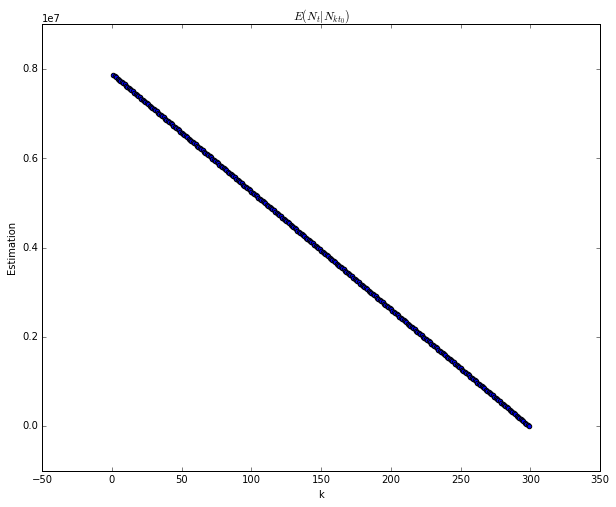

In [21]:
# Построим график
plt.figure(figsize = (10,8))
x = np.arange(1, 300, 1)
plt.scatter(x, predictions[x])
plt.title(r"$E(N_t|N_{kt_0})$")
plt.xlabel("k")
plt.ylabel("Estimation")
plt.show()

### Вывод №1(не окончательный). Как видим, предсказание начинается с очень большого числа и в дальнейшем, по мере увеличения времени прогноз улучшается, и в конце концов приходит к истинному значению, так как последний 1000-ый сервер сломался, как раз в конце.

### В целом, остаются вопросы, об эффективности такого метода предсказания, он дает очень завышенные ответы.

### Попробуем теперь взять другую $\lambda$

In [24]:
lamb = 0.0088

In [25]:
predictions, N_t = get_predictions()

Time:  300  Prediction:   791.36
Time:  600  Prediction:   791.72
Time:  900  Prediction:   795.08
Time:  1200  Prediction:   792.44
Time:  1500  Prediction:   791.8000000000001
Time:  1800  Prediction:   792.1600000000001
Time:  2100  Prediction:   793.5200000000001
Time:  2400  Prediction:   794.88
Time:  2700  Prediction:   797.24
Time:  3000  Prediction:   797.6
Time:  3300  Prediction:   796.96
Time:  3600  Prediction:   797.32
Time:  3900  Prediction:   798.6800000000001
Time:  4200  Prediction:   800.0400000000001
Time:  4500  Prediction:   801.4000000000001
Time:  4800  Prediction:   798.76
Time:  5100  Prediction:   799.12
Time:  5400  Prediction:   798.48
Time:  5700  Prediction:   799.84
Time:  6000  Prediction:   803.2
Time:  6300  Prediction:   803.5600000000001
Time:  6600  Prediction:   804.9200000000001
Time:  6900  Prediction:   805.2800000000001
Time:  7200  Prediction:   804.6400000000001
Time:  7500  Prediction:   807.0
Time:  7800  Prediction:   808.36
Time:  8100 

In [26]:
predictions[-1]

1000.0

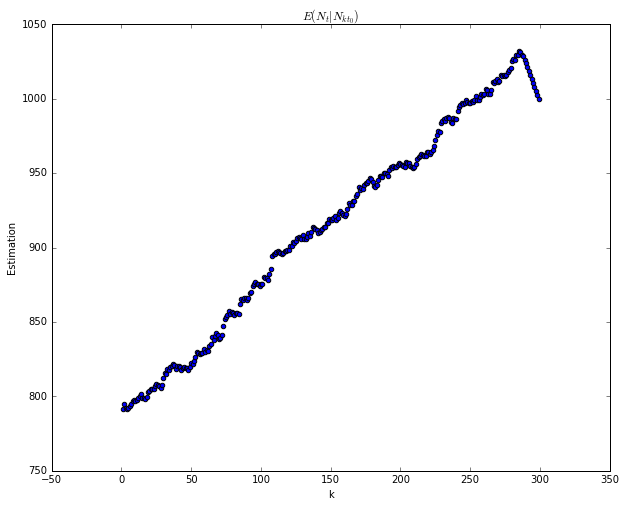

In [27]:
# Построим график
plt.figure(figsize = (10,8))
x = np.arange(1, 300, 1)
plt.scatter(x, predictions[x])
plt.title(r"$E(N_t|N_{kt_0})$")
plt.xlabel("k")
plt.ylabel("Estimation")
plt.show()

### Вывод: В данных, скорее всего, дана не та $\lambda$, если взять $\lambda = 0.0088$, то предсказания получаются намного лучше, они намного меньше отличаются от истинного ответа, а по мере выхождения серверов из строя, по-немногу исправляются и дают в итоге хороший результат.